In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('data.csv', index_col=0)

C:\Users\frobi\AppData\Local\Temp\ipykernel_28216\3602881507.py:1: DtypeWarning: Columns (3,8,10,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', index_col=0)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9479544 entries, 77074136 to 86000225
Data columns (total 37 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Country               object 
 1   VFN                   object 
 2   Mp                    object 
 3   Mh                    object 
 4   Man                   object 
 5   MMS                   float64
 6   Tan                   object 
 7   T                     object 
 8   Va                    object 
 9   Ve                    object 
 10  Mk                    object 
 11  Cn                    object 
 12  Ct                    object 
 13  Cr                    object 
 14  r                     int64  
 15  m (kg)                float64
 16  Mt                    float64
 17  Enedc (g/km)          float64
 18  Ewltp (g/km)          float64
 19  W (mm)                float64
 20  At1 (mm)              float64
 21  At2 (mm)              float64
 22  Ft                    object 
 23  Fm  

Essai de transformation des nan
suppression des colonnes à 100% nan

In [15]:
for column in df.columns[df.isnull().any()]:
    if df[column].isnull().sum()*100.0/df.shape[0] == 100:
        df.drop(column,axis=1, inplace=True)


Text(0.5, 1.0, 'HeatMap on quantitative data')

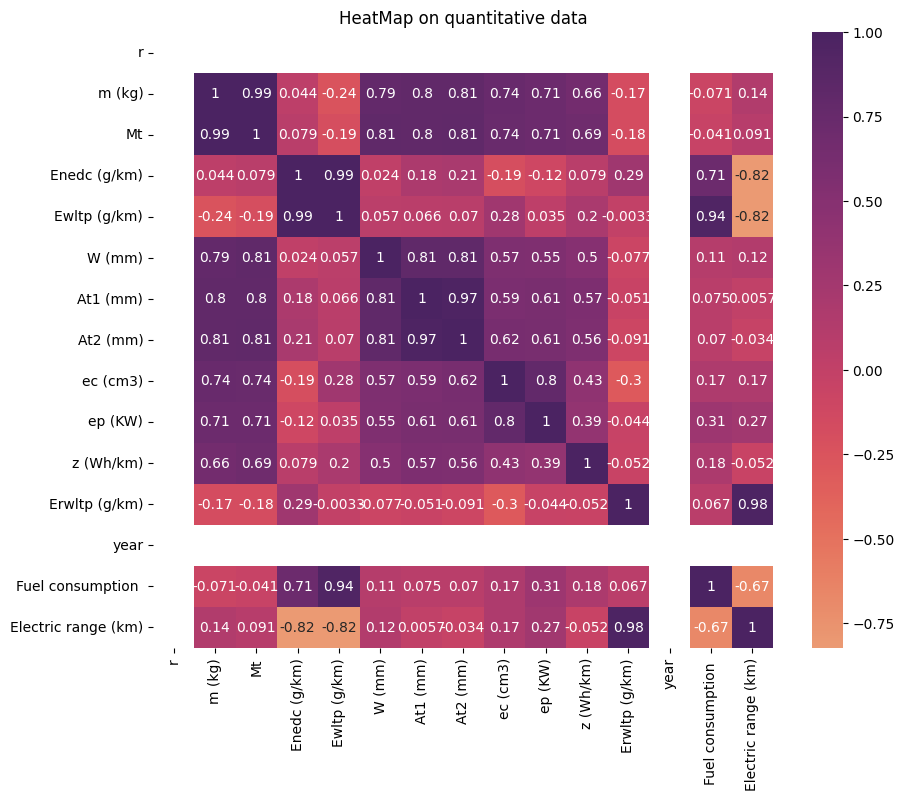

In [16]:

df_quantitative = df.select_dtypes(['int','float'])
#df_quantitative.fillna(value=df.mean(numeric_only=True))
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_quantitative.corr(),center=0,cmap='flare',annot=True)
plt.title('HeatMap on quantitative data')

In [14]:
df_quantitative.columns

Index(['MMS', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
       'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'year',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

Text(0, 0.5, 'Ewltp (g/km)')

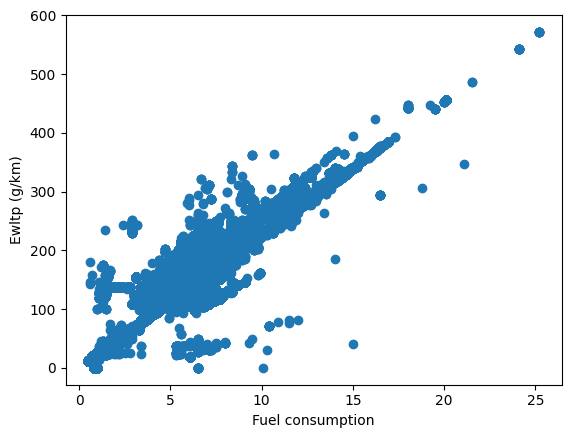

In [8]:
plt.scatter(df['Fuel consumption '],df['Ewltp (g/km)'])
plt.xlabel('Fuel consumption')
plt.ylabel('Ewltp (g/km)');

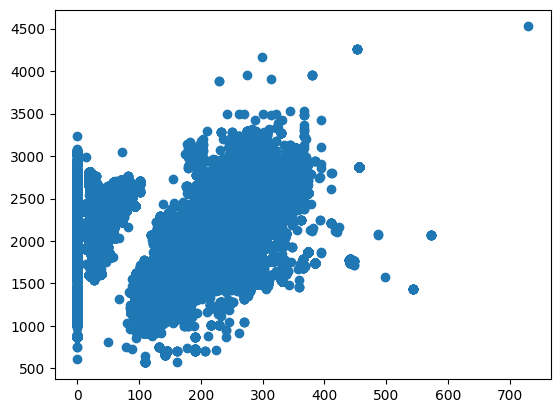

In [5]:
plt.scatter(df['Ewltp (g/km)'],df['m (kg)'])


In [9]:
df.columns

Index(['Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va', 'Ve',
       'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [5]:
print(df['Mh'].value_counts(normalize=True))

Mh
VOLKSWAGEN              1.080717e-01
STELLANTIS AUTO         8.831881e-02
RENAULT                 7.412329e-02
BMW AG                  6.595497e-02
MERCEDES-BENZ AG        5.835903e-02
                            ...     
BUGATTI RIMAC           3.164709e-07
LEAPMOTOR               2.109806e-07
FORD MOTOR AUSTRALIA    2.109806e-07
LEEH                    1.054903e-07
LEVC                    1.054903e-07
Name: proportion, Length: 97, dtype: float64


In [13]:
df[df['Mh'].str.contains('VOLVO')]['Mk']

ID
78550037    VOLVO
78550084    VOLVO
78550111    VOLVO
78550123    VOLVO
78550124    VOLVO
            ...  
85873021    VOLVO
85873023    VOLVO
85873025    VOLVO
85873027    VOLVO
85873029    VOLVO
Name: Mk, Length: 203541, dtype: object